# **Deep Learning Project: Street View Housing Number Digit Recognition**


--------------
## **Context**
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve the map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents.

----------------
## **Objective**
----------------

Our objective is to predict the number depicted inside the image by using Artificial or Fully Connected Feed Forward Neural Networks and Convolutional Neural Networks. We will go through various models of each and finally select the one that is giving us the best performance.

-------------
## **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been applied on the dataset.

## **Mount the drive**

Let us start by mounting the Google drive. You can run the below cell to mount the Google drive.

In [ ]:
from google.colab import drive
drive.mount('/content/MyDrive/')

Mounted at /content/MyDrive/


## **Importing the necessary libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import h5py

import tensorflow as tf
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, LeakyReLU, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam


from sklearn.metrics import classification_report, confusion_matrix


**Let us check the version of tensorflow.**

In [ ]:
# checking the tensorflow version that was imported from above
tf.__version__

'2.18.0'

## **Load the dataset**

- Let us now load the dataset that is available as a .h5 file.
- Split the data into the train and the test dataset.

In [ ]:
# setting the path to a variable from my google drive
path = '/content/MyDrive/MyDrive/
data = h5py.File(path, 'r')

# exploring the data keys to understand the data a bit more
print(data.keys())

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>


Check the number of images in the training and the testing dataset.

In [ ]:
# Break the data into training, val, and test sets based on the keys from above
X_train = np.array(data['X_train'])
y_train = np.array(data['y_train'])

X_val = np.array(data['X_val'])
y_val = np.array(data['y_val'])

X_test = np.array(data['X_test'])
y_test = np.array(data['y_test'])

# Determining the shape of the data
print('Train Set: ', X_train.shape, y_train.shape)
print('Validation Set: ', X_val.shape, y_val.shape)
print('Test Set: ', X_test.shape, y_test.shape)

Train Set:  (42000, 32, 32) (42000,)
Validation Set:  (60000, 32, 32) (60000,)
Test Set:  (18000, 32, 32) (18000,)


**Observation:**

1. We have standard train, val and test data buitl right into the data keys which will make easy for separating the data.
2. We will most likely not use the validation but will process it anyways
3. X Training - we have 42,000 images that are in grayscale that are size 32 x 32
4. X Validation - 60,000 images, grayscale, 32 x 32
5. X Test - 18,000 images, grayscale 32 x 32
6. We are missing the channel which may need reshaping later when working with CNN

## **Visualizing images**

- Use X_train to visualize the first 10 images.
- Use Y_train to print the first 10 labels.

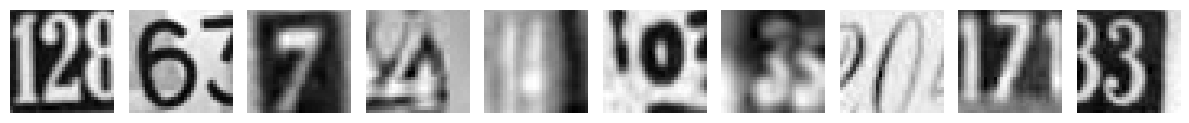

Training labels: [2 6 7 4 4 0 3 0 7 3]


In [ ]:
# Set up the figure
plt.figure(figsize = (12, 6))

# Loop through the first 10 images
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap='grey')
    plt.axis("off")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# print the training labels
labels = y_train[0:10]
print('Training labels:', labels)

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [ ]:
# printing the min and max values
print(np.min(X_train))
print(np.max(X_train))

0.0
254.9745


In [ ]:
print('First image shape:', X_train[0].shape)
print('First image pixels', X_train[0])

First image shape: (32, 32)
First image pixels [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


### **Normalize the train and the test data**

In [ ]:
# Normalzing the values
X_train = X_train/255
X_test = X_test/255
X_val = X_val/255

print(X_train[0])

[[0.12968785 0.11866706 0.10530196 ... 0.2801847  0.2283153  0.16860352]
 [0.09893451 0.10020902 0.1175549  ... 0.4432192  0.40534863 0.33056822]
 [0.10304902 0.08868118 0.15873058 ... 0.44432473 0.47754902 0.45263842]
 ...
 [0.11196157 0.14200786 0.17678471 ... 0.09465059 0.09840274 0.10219726]
 [0.15072627 0.10381687 0.09126157 ... 0.11023294 0.11556196 0.11790627]
 [0.19724864 0.10226392 0.0942702  ... 0.19477727 0.19942354 0.20799099]]


In [ ]:
# Flattening the data out to pass into an ANN
# 32 x 32 pixels in each image, flattening out to 1024

X_train = X_train.reshape(X_train.shape[0], 1024)
X_val = X_val.reshape(X_val.shape[0], 1024)
X_test = X_test.reshape(X_test.shape[0], 1024)



Print the shapes of Training and Test data

In [ ]:
# Determining the shape of the data
print('Train Set: ', X_train.shape, y_train.shape)
print('Validation Set: ', X_val.shape, y_val.shape)
print('Test Set: ', X_test.shape, y_test.shape)

Train Set:  (42000, 1024) (42000,)
Validation Set:  (60000, 1024) (60000,)
Test Set:  (18000, 1024) (18000,)


### **One-hot encode output**

In [ ]:
# using the to_categorical method from tf to one hot encode the output daata
y_train = tf.keras.utils.to_categorical(y_train, num_classes = 10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes = 10)
y_val = tf.keras.utils.to_categorical(y_val, num_classes = 10)

In [ ]:
# to_categorical setting to dtype float64, casuing issues when building and fitting our model later, adding this
y_train = y_train.astype('float32')
y_val = y_val.astype('float32')
y_test = y_test.astype('float32')

# Verify fix
print("New y_train dtype:", y_train.dtype)


New y_train dtype: float32


In [ ]:
# verifying that we have encoded the data correctly
np.unique(y_train)

array([0., 1.], dtype=float32)

**Observation:**



1. Train and test Data is normalized
2. Train and Test Data is shaped and flattened to pass into our ANN
3. Target/output data is encoded into vector of 0/1s
4. Ran into some issues later on in the data set with the data types, added in some data type conversions to ensure same data types across




## **Model Building**

Now that we have done the data preprocessing, let's build an ANN model.

### Fix the seed for random number generators

In [ ]:
# setting the random seed to 42
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

### **Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **64 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **32 nodes and the relu activation**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_1 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train an ANN model as per the above mentioned architecture.**

In [ ]:
# creating an ANN model with two hidden layers and one output layer
def nn_model_1():
  model = Sequential([

        #adding three layers per the specs listed above
        Dense(64, activation = 'relu', input_shape = (1024,)),
        Dense(32, activation = 'relu'),
        Dense(10, activation = 'softmax')
    ])

  model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

  return model


In [ ]:
# building the model
model_1 = nn_model_1()
model_1.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 68,010 (265.66 KB)

 Trainable params: 68,010 (265.66 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)

print('Data Type X_train:', X_train.dtype)
print('Data Type y_train:', y_train.dtype)


X_train shape: (42000, 1024)
y_train shape: (42000, 10)
Data Type X_train: float32
Data Type y_train: float32


In [ ]:
# fitting the model with the above specs and storing the history
fit_history_1 = model_1.fit(X_train, y_train, validation_split = 0.2, batch_size = 128, verbose = 1, epochs = 20)


Epoch 1/20


NotFoundError: Graph execution error:

Detected at node StatefulPartitionedCall defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start

  File "/usr/local/lib/python3.11/dist-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/lib/python3.11/asyncio/base_events.py", line 608, in run_forever

  File "/usr/lib/python3.11/asyncio/base_events.py", line 1936, in _run_once

  File "/usr/lib/python3.11/asyncio/events.py", line 84, in _run

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 499, in process_one

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 730, in execute_request

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py", line 383, in do_execute

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/zmqshell.py", line 528, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-19-9c3b9204e638>", line 2, in <cell line: 0>

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 371, in fit

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 219, in function

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 132, in multi_step_on_iterator

could not find registered transfer manager for platform Host -- check target linkage
	 [[{{node StatefulPartitionedCall}}]] [Op:__inference_multi_step_on_iterator_1337]

### **Plot the Training and Validation Accuracies and write down your Observations.**

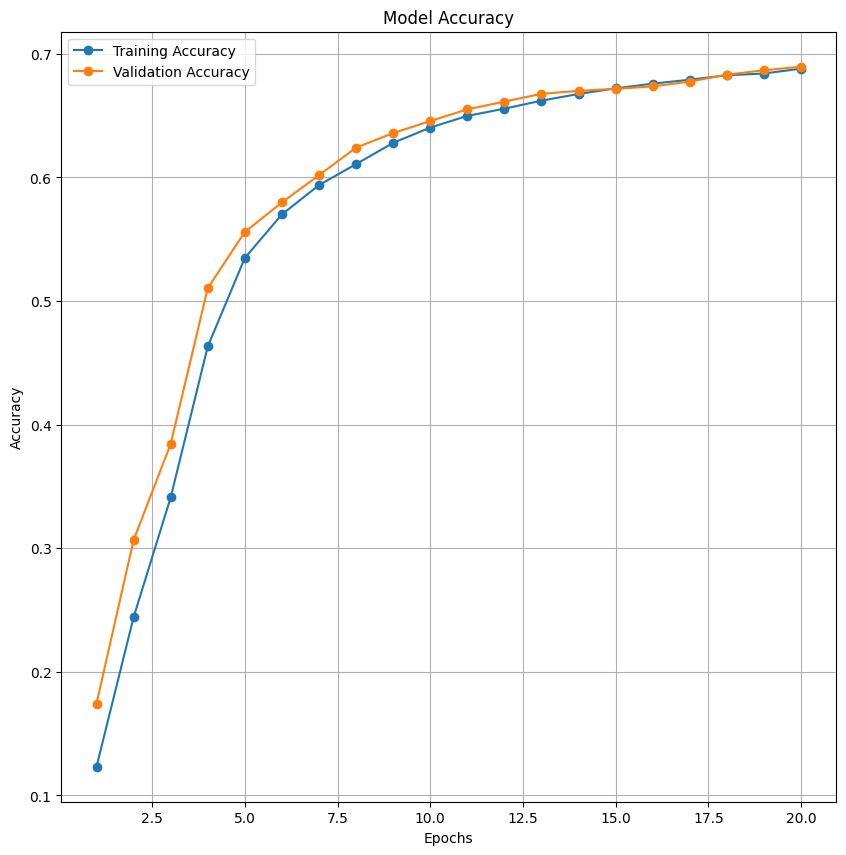

In [ ]:

# setting the variables to use in the plot
train_acc = fit_history_1.history['accuracy']
val_acc = fit_history_1.history['val_accuracy']
epochs = range(1, len(train_acc) + 1)

# Create the plot
plt.figure(figsize = (10, 10))
plt.plot(epochs, train_acc, label = 'Training Accuracy', marker = 'o')
plt.plot(epochs, val_acc, label = 'Validation Accuracy', marker = 'o')

# Formatting the plot
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.grid(True)
plt.show()

**Observations:_______**

1. Accuracy tops out at around 69%. The model looks to be learning effectively judging by the increase in accuracy over the epochs.
2. No major signs of overfitting.
3. Our loss is not decreasing as we would hope
4. Overall this might be not the best approach for this data, we can shoot to add more hidden layers or nuerons to see if we can improve, but may not be the best approach to classify this data.

Let's build one more model with higher complexity and see if we can improve the performance of the model.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [ ]:
# clear the previous model results from memory
tf.keras.backend.clear_session()

### **Second Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **256 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **128 nodes and the relu activation**
 - Add the **Dropout layer with the rate equal to 0.2**
 - Third hidden layer with **64 nodes and the relu activation**
 - Fourth hidden layer with **64 nodes and the relu activation**
 - Fifth hidden layer with **32 nodes and the relu activation**
 - Add the **BatchNormalization layer**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 -Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.0005), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_2 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the new ANN model as per the above mentioned architecture**

In [ ]:
def nn_model_2():
    model = Sequential([
        Dense(128, activation = 'relu', input_shape = (1024,)),
        Dense(64, activation = 'relu'),
        Dense(32, activation = 'relu'),
        Dense(10, activation = 'softmax')
    ])

    # Compile the model
    model.compile(optimizer = Adam(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

    return model

In [ ]:
# Create and summarize the new model
model_2 = nn_model_2()
model_2.summary()

# Train the model
fit_history_2 = model_2.fit(X_train, y_train, validation_split = 0.2, batch_size = 128, verbose = 1, epochs = 30)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 141,866 (554.16 KB)

 Trainable params: 141,866 (554.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.0971 - loss: 2.3134 - val_accuracy: 0.1273 - val_loss: 2.2469
Epoch 2/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1938 - loss: 2.1490 - val_accuracy: 0.3618 - val_loss: 1.8002
Epoch 3/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3913 - loss: 1.7365 - val_accuracy: 0.4567 - val_loss: 1.5766
Epoch 4/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4790 - loss: 1.5288 - val_accuracy: 0.5136 - val_loss: 1.4528
Epoch 5/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.5437 - loss: 1.3944 - val_accuracy: 0.5849 - val_loss: 1.2923
Epoch 6/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5917 - loss: 1.2723 - val_accuracy: 0.6294 - val_loss: 1.1856
Epoch 7/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6202 - loss: 1.1929 - val_accuracy: 0.6483 - val_loss: 1.1247
Epoch 8/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6421 - loss: 1.1291 - val_accuracy:

### **Plot the Training and Validation Accuracies and write down your Observations.**

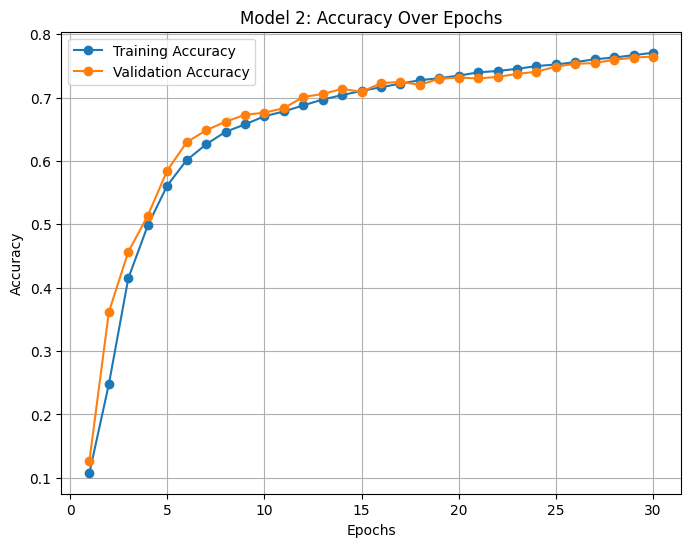

In [ ]:
# Extract accuracy from the training history
train_acc = fit_history_2.history['accuracy']
val_acc = fit_history_2.history['val_accuracy']
epochs = range(1, len(train_acc) + 1)

# Plot accuracy over epochs
plt.figure(figsize=(10, 10))
plt.plot(epochs, train_acc, label = 'Training Accuracy', marker = 'o')
plt.plot(epochs, val_acc, label = 'Validation Accuracy', marker = 'o')

# Formatting
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model 2: Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

**Observations:_______**

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

In [ ]:
predictions_prob = model_2.predict(X_test)
predictions = np.argmax(predictions_prob, axis = 1)

563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [ ]:
labels = np.argmax(y_test, axis = 1)

### **Print the classification report and the confusion matrix for the test predictions. Write your observations on the final results.**

Classification Report:

              precision    recall  f1-score   support

           0       0.78      0.79      0.79      1814
           1       0.76      0.79      0.78      1828
           2       0.79      0.80      0.80      1803
           3       0.67      0.75      0.71      1719
           4       0.79      0.82      0.81      1812
           5       0.76      0.70      0.73      1768
           6       0.78      0.77      0.77      1832
           7       0.81      0.83      0.82      1808
           8       0.74      0.71      0.72      1812
           9       0.79      0.70      0.74      1804

    accuracy                           0.77     18000
   macro avg       0.77      0.77      0.77     18000
weighted avg       0.77      0.77      0.77     18000



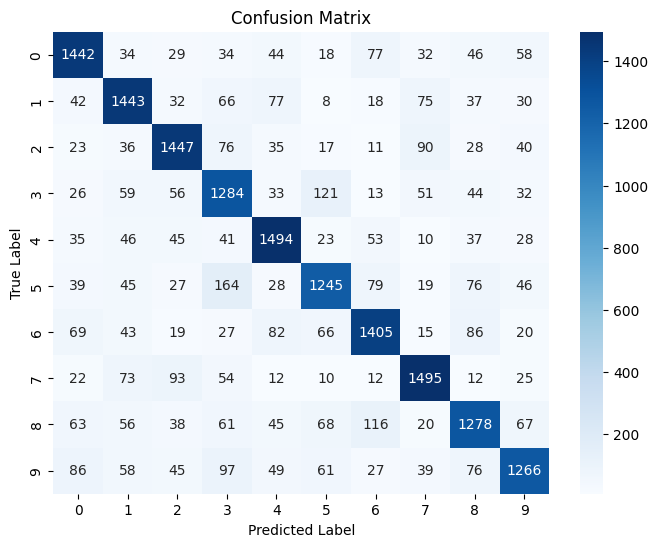

In [ ]:
print('Classification Report:')
print(classification_report(labels, predictions))

# Generate a confusion matrix
cm = confusion_matrix(labels, predictions)

# Plotting confusion matrix as a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt = 'd', cmap = 'Blues', xticklabels = range(10), yticklabels = range(10))

# Formatting
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

**Final Observations:__________**
Model 2 Observations:
1. Training and validation accuracy both improved in the secon model. The additional hidden layer and more nuerons did help.
2. The model is not overfitting, suggesting by the close training and validation accuracy rates.
3. Loss is still relatively high, suggesting that the model is still struggling over all.
4. Again the training diminished improvement as epochs continued suggesting that it may not improve with more.

Prediction Observations:
1. Overall the F1 scores are very similar across all classifications.
2. Classes 3, 5, 9 have slightly lower precisoun and recall.
3. From the confusion matrix it looks like the struggles with the digits 3 and 5 and often mis classifies them for one another.
4. The model seems to have the most success with digit 7.

The additions in the second model helped increase performance overall but ANNs do not seem to be the best model for this. Exploring CNNs should give us better results in classification.

## **Using Convolutional Neural Networks**

### **Load the dataset again and split the data into the train and the test dataset.**

In [ ]:
# setting the path to a variable from my google drive
cnn_path = '/content/MyDrive/
cnn_data = h5py.File(cnn_path, 'r')

# exploring the data keys to understand the data a bit more
print(cnn_data.keys())

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>


Check the number of images in the training and the testing dataset.

In [ ]:
# Break the data into training, val, and test sets based on the keys from above
X_train = np.array(cnn_data['X_train'])
y_train = np.array(cnn_data['y_train'])

X_val = np.array(cnn_data['X_val'])
y_val = np.array(cnn_data['y_val'])

X_test = np.array(cnn_data['X_test'])
y_test = np.array(cnn_data['y_test'])

# Determining the shape of the data
print('Train Set: ', X_train.shape, y_train.shape)
print('Validation Set: ', X_val.shape, y_val.shape)
print('Test Set: ', X_test.shape, y_test.shape)

Train Set:  (42000, 32, 32) (42000,)
Validation Set:  (60000, 32, 32) (60000,)
Test Set:  (18000, 32, 32) (18000,)


**Observation:**

We will need to reshape the data in order to process through a CNN. We are missing the Channel dimension.


## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Reshape the train and the test dataset because we always have to give a 4D array as input to CNNs.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [ ]:
print('First image shape:', X_train[0].shape)
print('First image pixels', X_train[0])

First image shape: (32, 32)
First image pixels [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


Reshape the dataset to be able to pass them to CNNs. Remember that we always have to give a 4D array as input to CNNs

In [ ]:
# Reshape to (num_samples, 32, 32, 1) for grayscale images
X_train = X_train.reshape(X_train.shape[0], 32, 32, 1)
X_val = X_val.reshape(X_val.shape[0], 32, 32, 1)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 1)

Normalize inputs from 0-255 to 0-1

In [ ]:
X_train = X_train.astype('float32') / 255
X_val = X_val.astype('float32') / 255
X_test = X_test.astype('float32') / 255

Print New shape of Training and Test

In [ ]:
# Verify the new shape
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (42000, 32, 32, 1)
X_test shape: (18000, 32, 32, 1)


### **One-hot encode the labels in the target variable y_train and y_test.**

In [ ]:
# using the to_categorical method from tf to one hot encode the output daata
y_train = tf.keras.utils.to_categorical(y_train, num_classes = 10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes = 10)
y_val = tf.keras.utils.to_categorical(y_val, num_classes = 10)

In [ ]:
print(y_train[0], y_test[0])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
y_train = y_train.astype('float32')
y_val = y_val.astype('float32')
y_test = y_test.astype('float32')

In [ ]:
print('Data Type X_train:', X_train.dtype)
print('Data Type y_train:', y_train.dtype)

Data Type X_train: float32
Data Type y_train: float32


**Observation:**

When using the to_categorical, ran into the same data type conversion with 32 and 64. Added quick code to handle the data type conversions.


## **Model Building**

Now that we have done data preprocessing, let's build a CNN model.
Fix the seed for random number generators

In [ ]:
# setting the random seed to 42
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

### **Model Architecture**
- **Write a function** that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Another **LeakyRelu** with the **slope equal to 0.1**
 - A **max-pooling layer** with a **pool size of 2x2**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_1 and store the output in a new variable.
- Print the summary of the model.
- Fit the model on the training data with a **validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train a CNN model as per the above mentioned architecture.**

In [ ]:
def cnn_model_1():
    model = Sequential([
        Conv2D(16, kernel_size = (3,3), padding = 'same', input_shape = (32, 32, 1)),
        LeakyReLU(alpha = 0.1),
        Conv2D(32, kernel_size = (3,3), padding = 'same'),
        LeakyReLU(alpha = 0.1),
        MaxPooling2D(pool_size = (2,2)),
        Flatten(),
        Dense(32),
        LeakyReLU(alpha = 0.1),
        Dense(10, activation = 'softmax')
    ])

    # Compile the model
    model.compile(optimizer=Adam(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

    return model

In [ ]:
cnn_1 = cnn_model_1()
cnn_1.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 32, 32, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │         262,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 267,306 (1.02 MB)

 Trainable params: 267,306 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
fit_history_cnn_1 = cnn_1.fit(X_train, y_train, validation_split = 0.2, batch_size = 32, verbose = 1, epochs = 10)

Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.4095 - loss: 1.6650 - val_accuracy: 0.8096 - val_loss: 0.6565
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8337 - loss: 0.5752 - val_accuracy: 0.8252 - val_loss: 0.5979
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8638 - loss: 0.4686 - val_accuracy: 0.8457 - val_loss: 0.5436
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8834 - loss: 0.3992 - val_accuracy: 0.8561 - val_loss: 0.5178
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8988 - loss: 0.3489 - val_accuracy: 0.8629 - val_loss: 0.5100
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9125 - loss: 0.3060 - val_accuracy: 0.8667 - val_loss: 0.5044
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9234 - loss: 0.2717 - val_accuracy: 0.8675 - val_loss: 0.5241
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9335 - loss: 0.2429 - 

### **Plot the Training and Validation Accuracies and Write your observations.**

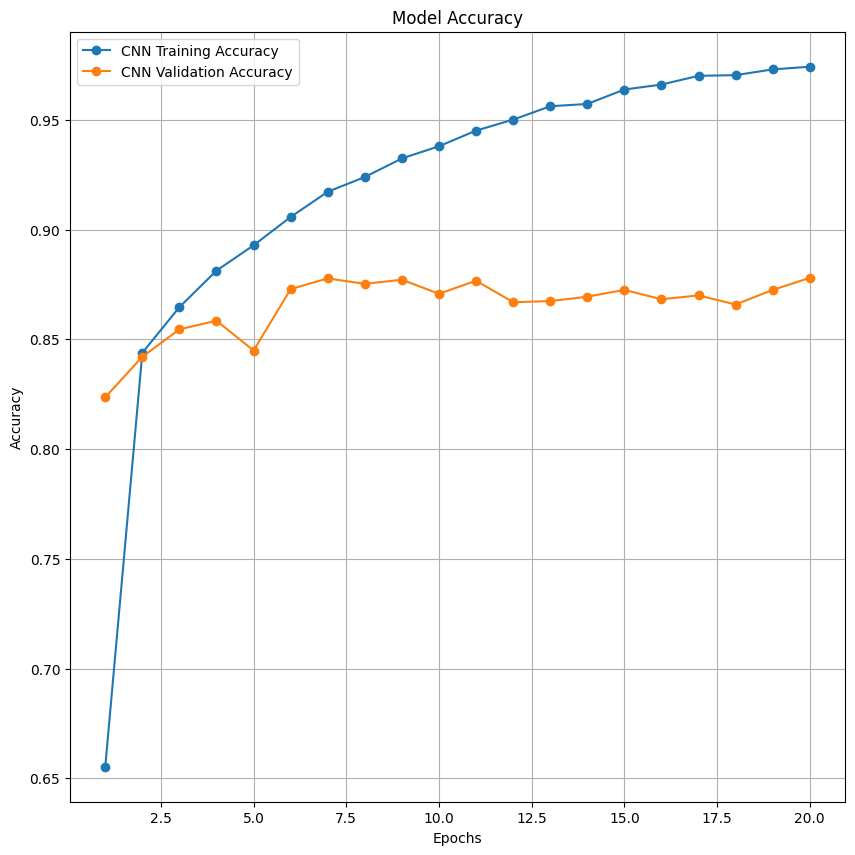

In [ ]:
# setting the variables to use in the plot
train_acc = fit_history_cnn_1.history['accuracy']
val_acc = fit_history_cnn_1.history['val_accuracy']
epochs = range(1, len(train_acc) + 1)

# Create the plot
plt.figure(figsize=(10, 10))
plt.plot(epochs, train_acc, label = 'CNN Training Accuracy', marker = 'o')
plt.plot(epochs, val_acc, label = 'CNN Validation Accuracy', marker = 'o')

# Formatting the plot
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.grid(True)
plt.show()

**Observations:__________**

1. We have a very high training accuracy with the first CNN model. This outperforms our ANN significantly as expected
2. As the epochs progressed we saw a dimisnishing return, especially the last 4, suggesting the model will not benefit from more epochs.
3. Overfitting - we see very high accruacy on our training data, but on average a 10% decrease in accuracy within the valdiation for each epoch. Suggests the model is very good but potentially memorizing the training data.

Let's build another model and see if we can get a better model with generalized performance.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [ ]:
# clear the previous model results from memory
tf.keras.backend.clear_session()

### **Second Model Architecture**

- Write a function that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add **LeakyRelu** with the **slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - Third Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Fourth Convolutional layer **64 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **dropout layer with the rate equal to 0.5**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_2 and store the model in a new variable.
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the second CNN model as per the above mentioned architecture.**

In [ ]:
def cnn_model_2():
    model = Sequential([
        Conv2D(16, kernel_size = (3,3), padding = 'same', input_shape = (32, 32, 1)),
        LeakyReLU(alpha=0.1),
        Conv2D(32, kernel_size = (3,3), padding = 'same'),
        LeakyReLU(alpha=0.1),
        MaxPooling2D(pool_size = (2,2)),
        BatchNormalization(),
        Conv2D(32, kernel_size = (3,3), padding = 'same'),
        LeakyReLU(alpha = 0.1),
        Conv2D(64, kernel_size = (3,3), padding = 'same'),
        LeakyReLU(alpha = 0.1),
        MaxPooling2D(pool_size = (2,2)),
        BatchNormalization(),
        Flatten(),
        Dense(32),
        LeakyReLU(alpha = 0.1),
        Dropout(0.5),
        Dense(10, activation = 'softmax')
    ])

    # Compile the model
    model.compile(optimizer = Adam(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

    return model

In [ ]:
cnn_2 = cnn_model_2()
cnn_2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 32, 32, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 16, 16, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_5 (LeakyReLU)            │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 8, 8, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │         131,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_6 (LeakyReLU)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 164,362 (642.04 KB)

 Trainable params: 164,170 (641.29 KB)

 Non-trainable params: 192 (768.00 B)

In [ ]:
fit_history_cnn_2 = cnn_2.fit(X_train, y_train, validation_split = 0.2, batch_size = 128, verbose = 1, epochs = 30)

Epoch 1/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 151s 557ms/step - accuracy: 0.3487 - loss: 1.8795 - val_accuracy: 0.2418 - val_loss: 2.0990
Epoch 2/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 149s 568ms/step - accuracy: 0.7966 - loss: 0.6683 - val_accuracy: 0.8293 - val_loss: 0.5415
Epoch 3/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 206s 583ms/step - accuracy: 0.8323 - loss: 0.5396 - val_accuracy: 0.8612 - val_loss: 0.4744
Epoch 4/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 204s 593ms/step - accuracy: 0.8569 - loss: 0.4736 - val_accuracy: 0.8735 - val_loss: 0.4330
Epoch 5/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 162s 615ms/step - accuracy: 0.8706 - loss: 0.4240 - val_accuracy: 0.8879 - val_loss: 0.4045
Epoch 6/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 165s 474ms/step - accuracy: 0.8799 - loss: 0.3907 - val_accuracy: 0.8780 - val_loss: 0.4172
Epoch 7/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 179s 616ms/step - accuracy: 0.8902 - loss: 0.3514 - val_accuracy: 0.9002 - val_loss: 0.3535
Epoch 8/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 143s 542ms/step - accuracy: 0.8965 -

### **Plot the Training and Validation accuracies and write your observations.**

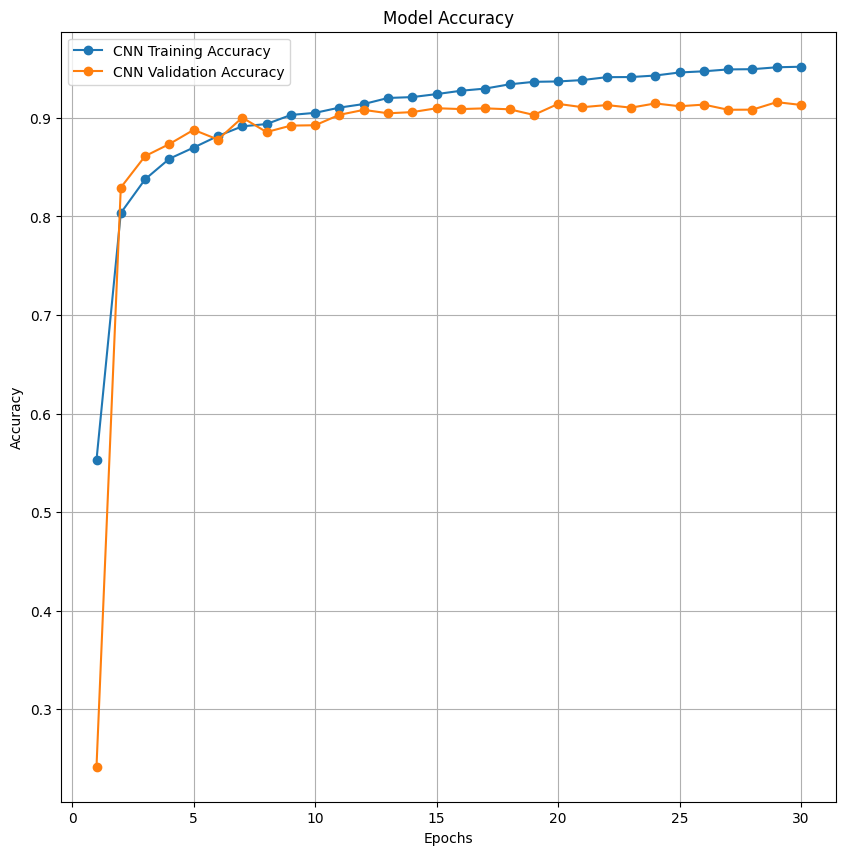

In [ ]:
# setting the variables to use in the plot
train_acc = fit_history_cnn_2.history['accuracy']
val_acc = fit_history_cnn_2.history['val_accuracy']
epochs = range(1, len(train_acc) + 1)

# Create the plot
plt.figure(figsize = (10, 10))
plt.plot(epochs, train_acc, label = 'CNN Training Accuracy', marker = 'o')
plt.plot(epochs, val_acc, label = 'CNN Validation Accuracy', marker = 'o')

# Formatting the plot
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.grid(True)
plt.show()

**Observations:________**

1. This model has the highest training accuracy at around 95%
2. Its much higher than the ANNs models and the cnn model 1 that we built
3. Validation is also very strong showing at around 91% suggesting that the model does very well on unseen data.
4. The 4% discrepancy between our training and validation accuracy does suggest we have some small overfitting. The inclusions of Batch Normalization and Droput helped prevent the overfitting we saw in model 1.
5. Our Validation loss remains about the same since Epoch 22, suggesting that we may have reached our performance limits
6. The Validation loss also seems to being to increase towards the last few epochs, and we could look to add potential options to stop when our model stops improving.

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

### **Make predictions on the test data using the second model.**

In [ ]:
# Get model predictions (probabilities)
predictions_prob = cnn_2.predict(X_test)
predictions = np.argmax(predictions_prob, axis=1)

563/563 ━━━━━━━━━━━━━━━━━━━━ 18s 32ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector, but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [ ]:
labels = np.argmax(y_test, axis=1)

### **Write your final observations on the performance of the model on the test data.**

CNN Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1814
           1       0.90      0.91      0.91      1828
           2       0.93      0.91      0.92      1803
           3       0.87      0.89      0.88      1719
           4       0.91      0.93      0.92      1812
           5       0.89      0.93      0.91      1768
           6       0.91      0.89      0.90      1832
           7       0.94      0.91      0.93      1808
           8       0.90      0.90      0.90      1812
           9       0.91      0.90      0.91      1804

    accuracy                           0.91     18000
   macro avg       0.91      0.91      0.91     18000
weighted avg       0.91      0.91      0.91     18000



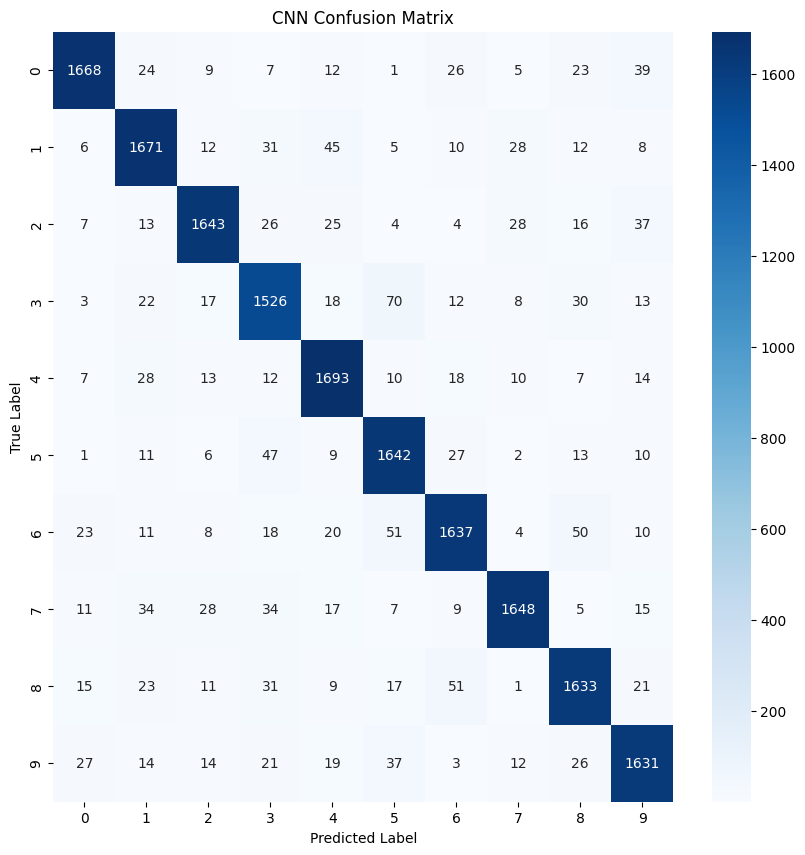

In [ ]:
print('CNN Classification Report:')
print(classification_report(labels, predictions))

# Generate a confusion matrix
cm = confusion_matrix(labels, predictions)

# Plotting confusion matrix as a heatmap
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = range(10), yticklabels = range(10))

# Formatting
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('CNN Confusion Matrix')
plt.show()

**Prediction Observations:_________**

1. CNN performs well across all classifications and we do not see any major imbalances in the digits. We see consistent recall, precision and F1 score across all.

# Final Observations
1. CNNs outperformed ANNs in classification significantly. The CNN model 2 that we built was almost 25% better in terms of accuracy.
2. As expected CNNS > ANNs in classificaiton due to the spatiality.
3. CNN Model 1, performed significantly better than the ANNs, but showed signs of overfitting.
4. CNN Model 2, with its updates over CNN Model 1, inlcuding the Batch Normalization and Droput make this the recommended model for this classificaiton task given the four models we tested.

CNN Model 2 is the recommended model.
